### Nama : Alifiyul Akyun
### Kelas : TI-3B
### NIM : 2041720036

## Tugas

Buatlah sebuah model KMeans dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model KMeans dengan mempertimbangkan jumlah $k$ yang terbaik. -> elbow method

## Jawab

### 1. Load data Mall_Customers

In [2]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Fitur untuk melakukan clustering

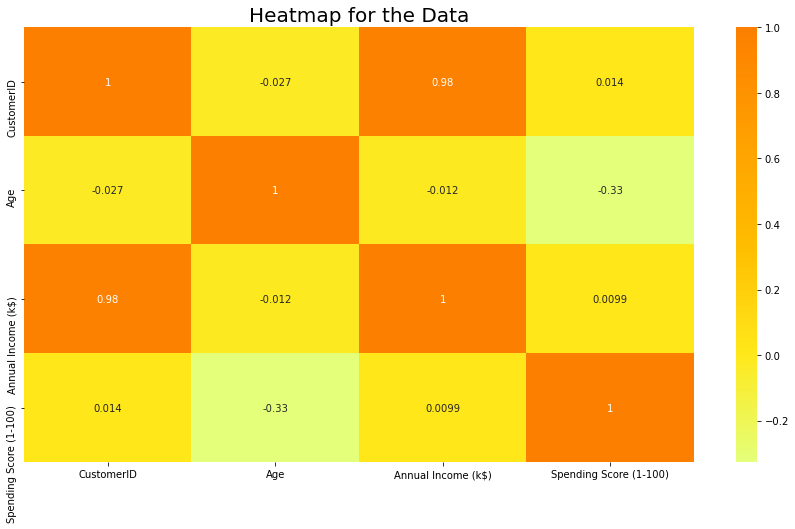

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

Dari heatmap diatas, dapat disimpulkan bahwa fitur yang berkorelasi kuat yaitu :
1. Annual Income dan CustomerID
2. Annual Income dan Spending Score

Karena CustomerID tidak mungkin memengaruhi proses untuk melakukan clustering, maka yang dapat menjadi fitur **annual income** dan **spending score**

In [5]:
x = df.iloc[:, [3, 4]]

x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 3. Model KMeans dengan mempertimbangkan jumlah $k$

C:\Users\ALIFIYUL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ALIFIYUL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ALIFIYUL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ALIFIYUL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory le

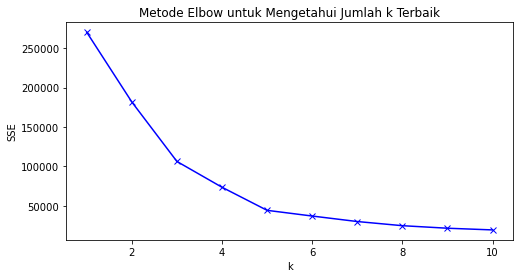

In [6]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,11)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [7]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181665.82312925172
k=3; SSE=106348.37306211122
k=4; SSE=73679.78903948836
k=5; SSE=44448.4554479337
k=6; SSE=37233.814510710006
k=7; SSE=30273.394312070042
k=8; SSE=25011.839349156588
k=9; SSE=21797.08494464637
k=10; SSE=19657.78360870395


### Tampilan Visualisasi

In [8]:
# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=5)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(x)

C:\Users\ALIFIYUL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


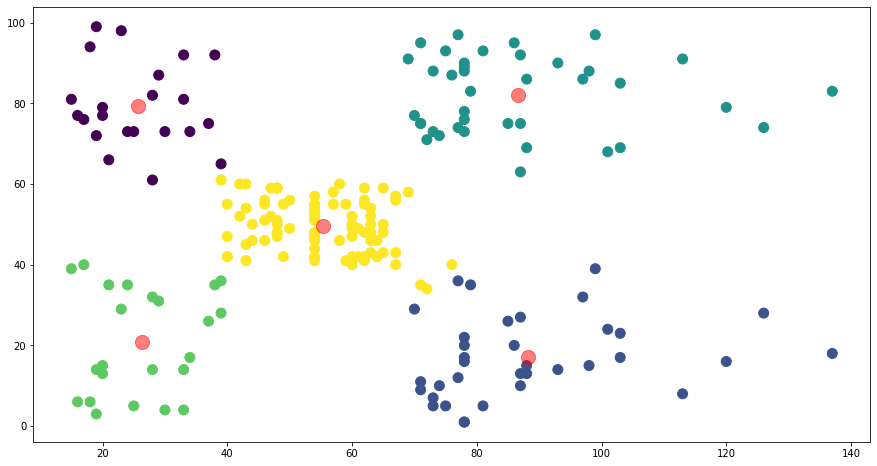

In [9]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)